# Embedding Plots and Visualisations

Jede nutzbare Analyse und Visualisierungen sind hier gesammelt. 


In [1]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import save_load_models as save_load
import helper_methods as hmethods
import vector_search as vs
import visual_and_cluster as vis_cl

/home/abecker/.conda/envs/BachelorEnv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
multiMini = './Models/multilingual-MiniLM'
msMarcoMini = './Models/msmarco-MiniLM'
wikimedicalBioBert = './Models/wikimedical-BioBERT'
sPubMedBert = './Models/SPubMedBERT'

sPubMedBertFinetunedv1 = './Models/Finetunedv1/SPubMedBERT/end_model'
sPubMedBertFinetunedv2 = './Models/Finetunedv2/SPubMedBERT/end_model'
sPubMedBertFinetunedNfcorpus = './Models/Finetuned/SPubMedBERT-v1-nfcorpus'

model = save_load.load_model_sentencetransformer(sPubMedBertFinetunedNfcorpus)

In [3]:
'''
MultiMini
MsMarcoMini
WikiMedicalBERT
SPubMedBERT

SPubMedBERTFinetunedv1
SPubMedBERTFinetunedv2
SPubMedBERTFinetunedNfcorpus
'''
model_name = "SPubMedBERTFinetunedNfcorpus"

In [4]:
multiMiniDir = './Embeddings/multilingual-MiniLM/'
msMarcoMiniDir = './Embeddings/msmarco-MiniLM/'
wikimedicalBioBertDir = './Embeddings/wikimedical-BioBERT/'
sPubMedBertDir = './Embeddings/SPubMedBERT/'

sPubMedBertFinetunedv1Dir = './Embeddings/Finetunedv1/SPubMedBERT/'
sPubMedBertFinetunedv2Dir = './Embeddings/Finetunedv2/SPubMedBERT/'
sPubMedBertFinetunedNfcorpusDir = './Embeddings/FinetunedNfCorpus/SPubMedBERT/'

### Load Embeddings

In [5]:
reload(vs)
# Test_Data_Subset
embeddingDir = sPubMedBertFinetunedNfcorpusDir + 'Test_Data_Subset'

embeddings, refList = vs.add_embeddings_to_nparray_from_dir(embeddingDir)

### Query Embeddings

In [6]:
queryList = ["emergency treatment of sepsis", "choosing the point of care for acute health problems", 
              "covid and kidney disease", "How does delir impact the onset of dementia", 
              "NLP pipeline for medical publications", "chronic kidney disease", 
              "Natural Alzheimer's Treatment", "Covid long term effects",
             "How does delir impact the onset of alzheimer"]

queryRef, querySimilarity, queryEmbeddings = vs.query_articles(queryList, embeddings, np.reshape(refList, (-1, 1)), model, n=80, print_results=False)

query_types = {'Title':0,'Abstract':0}
for ref in np.array(queryRef).flatten():
    query_types[ref.split('-')[0]] +=1
print(query_types)

query_idx = 6
#print("Show Articles for Query: ", queryList[query_idx])
#articles = vs.get_articles(queryRef[query_idx], dir_path=embeddingDir)

{'Title': 457, 'Abstract': 263}


## Abstract-Title Similarity
Use only when there are only 2 Embeddings calculated.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
sample_embeddings = embeddings[:2000]
sim=[]
for i in range(0, sample_embeddings.shape[0], 2):
    sim.append(cosine_similarity([sample_embeddings[i]], [sample_embeddings[i+1]]))
sim_mean = np.mean(sim)
all_similarity = vs.calc_all_embedding_similarity(sample_embeddings, scaled=False)
avg_sim = np.mean(all_similarity)

lines = [
    f"Numbers for Model: {model_name}",
    (u"\u2500" * 35),
    f"Article-Title Mean: {sim_mean:.5f}",
    f"Average Similarity: {avg_sim:.5f}",
    f"Scaled Article-Title Mean: {sim_mean/avg_sim:.5f}"
]

# Open a file in write mode
with open(f'Plots/ViolinPlots/Numbers{model_name}.txt', 'w') as file:
    for line in lines: 
        file.write(line + '\n')
        print(line)

Numbers for Model: SPubMedBERTFinetunedNfcorpus
───────────────────────────────────
Article-Title Mean: 0.86452
Average Similarity: 0.52922
Scaled Article-Title Mean: 1.63357


### Plot the similarities

Plot Violin Plots of the Title-Abstract Similarities, the similarity between all points

#### Unscaled Similarity

Just raw version of the similarities.

[]

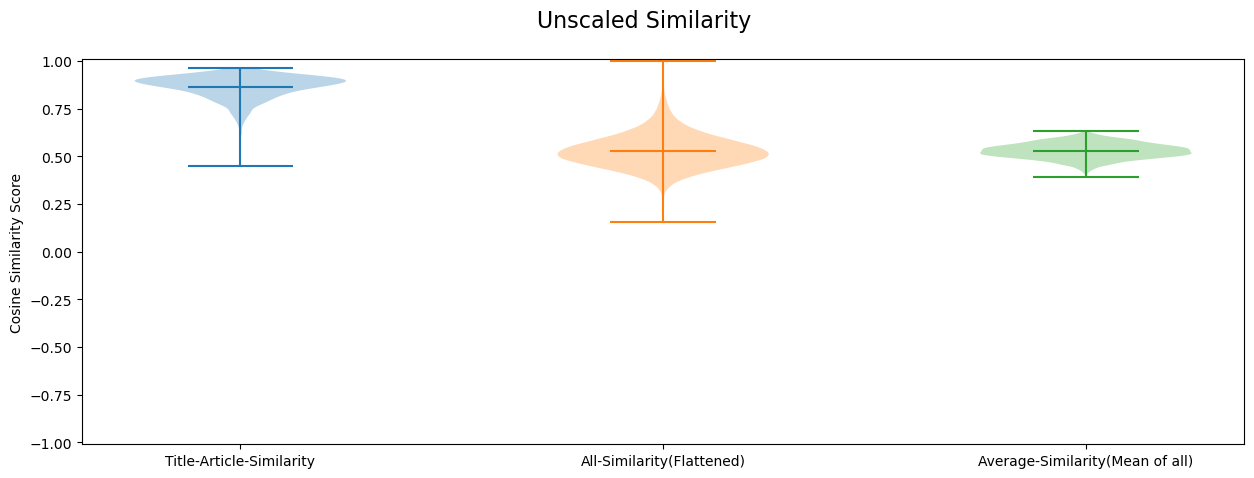

In [ ]:

sim = np.squeeze(sim)
all_similarity_flattened = np.array(all_similarity).flatten()
all_similarity_mean = np.mean(all_similarity, axis=0)

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Unscaled Similarity', fontsize=16)
plt.ylabel('Cosine Similarity Score', fontsize=10)

plt.violinplot(sim, positions=[1], showmeans=True, showextrema= True)
plt.violinplot(all_similarity_flattened, positions=[2], showmeans=True, showextrema= True)
plt.violinplot(all_similarity_mean, positions=[3], showmeans=True, showextrema= True)
#plt.axhline(y=avg_sim, color='r', linestyle='dashed')
plt.ylim(ymin=-1.01, ymax=1.01)
plt.xticks([1,2,3],labels=['Title-Abstract-Similarity','All-Similarity(Flattened)', 'Average-Similarity(Mean of all)'])

plt.savefig(f'Plots/ViolinPlots/Unscaled{model_name}.png')
plt.plot()

In [9]:
x = min(all_similarity_flattened)
y = max(all_similarity_flattened)
x_c = np.where(all_similarity_flattened==x)[0][0]
y_c = np.where(all_similarity_flattened==y)[0][0]
print("x: %f :"%x, x_c%2000, x_c//2000)
print("y: %f :"%y, y_c%2000, y_c//2000)

x: 0.156555 : 842 429
y: 1.000000 : 1014 1014


#### Scaled Similarity

Scaled the similarity to be between 0 and 1. Makes for a different comparison.

[]

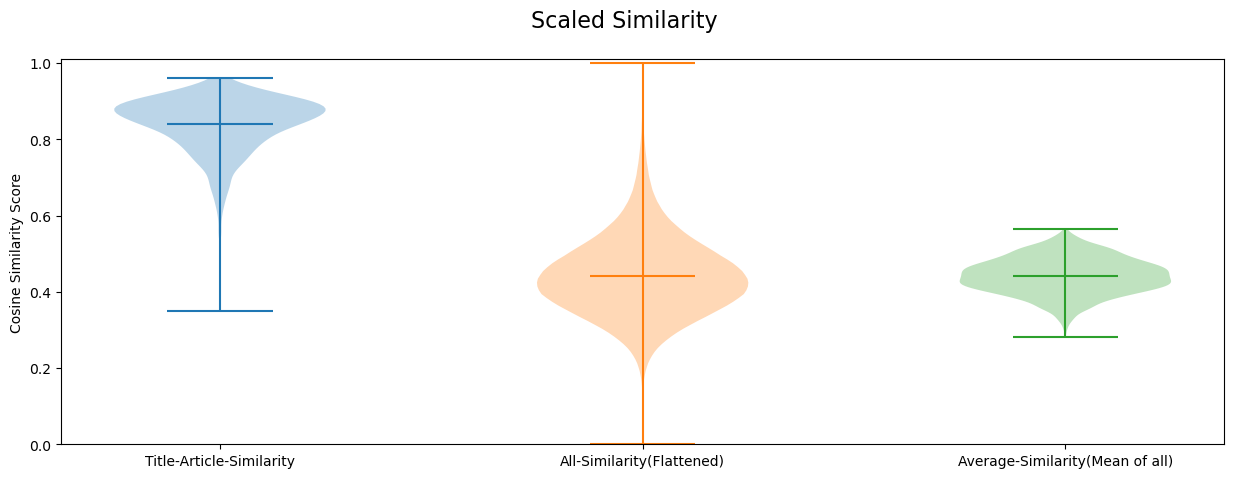

In [10]:
min_sim = np.min(all_similarity_flattened)
max_sim = np.max(all_similarity_flattened)

all_similarity_flattened_scaled = ((all_similarity_flattened - min_sim) / (max_sim - min_sim))
all_similarity_mean_scaled = ((all_similarity_mean - min_sim) / (max_sim - min_sim))
sim_scaled = ((sim - min_sim) / (max_sim - min_sim))

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Scaled Similarity', fontsize=16)
plt.ylabel('Cosine Similarity Score', fontsize=10)

plt.violinplot(sim_scaled, positions=[1], showmeans=True, showextrema= True)
plt.violinplot(all_similarity_flattened_scaled, positions=[2], showmeans=True, showextrema= True)
plt.violinplot(all_similarity_mean_scaled, positions=[3], showmeans=True, showextrema= True)
#plt.axhline(y=avg_sim, color='r', linestyle='dashed')
plt.ylim(ymin=0, ymax=1.01)
plt.xticks([1,2,3],labels=['Title-Article-Similarity','All-Similarity(Flattened)', 'Average-Similarity(Mean of all)'])

plt.savefig(f'Plots/ViolinPlots/Scaled{model_name}.png')
plt.plot()

## Visualisation

### Color Map

In [11]:
cmap = plt.get_cmap('tab20')
my_cmap = cmap(np.arange(cmap.N))
alpha = np.full((cmap.N,), 0.8)
alpha[0] = 0.05
my_cmap[:,-1] = alpha
my_cmap = ListedColormap(my_cmap)

# ['pca', 'pca_tsne', 'agglo_tsne']

### Show 2d

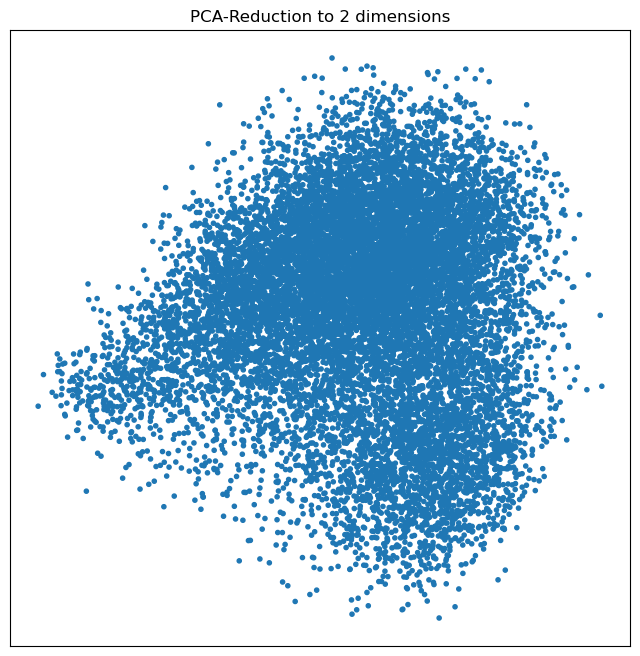

In [12]:
reload(vis_cl)

redCalc =vis_cl.plot_reduce_dimensions(embeddings, methods=['pca'])

### Show Embedding Types

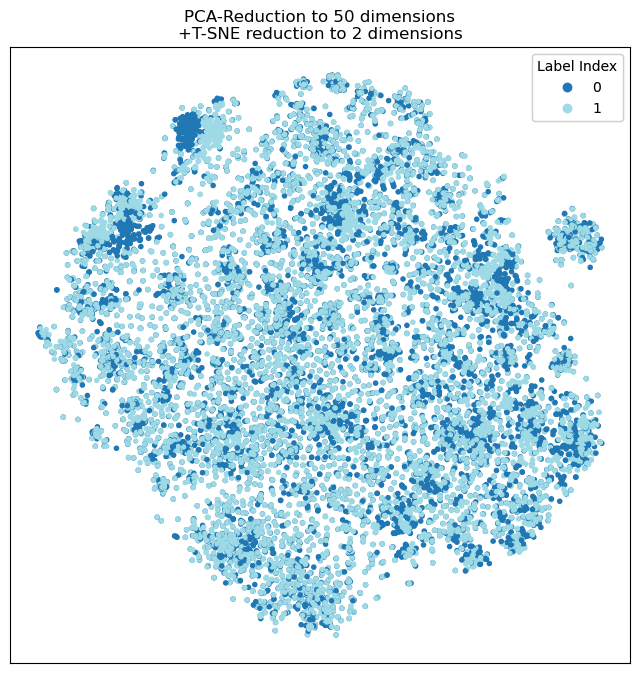

In [20]:
reload(vis_cl)
# agglo_tsne
# pca_tsne
method_type = 'pca_tsne'

ref_list = refList.squeeze()
labels = [0] * len(ref_list)
embedd_cp = embeddings
#embedd_cp = np.delete(embeddings, 424, axis=1)

labels = [a.split("-")[0] for a in ref_list]
labels = [0 if l == 'Title' else 1 if l =='Abstract' else 2 for l in labels]

redCalc = vis_cl.plot_reduce_dimensions(embedd_cp, methods=[method_type], labels=labels, model_name=model_name)

### Plotly show metadata coloring

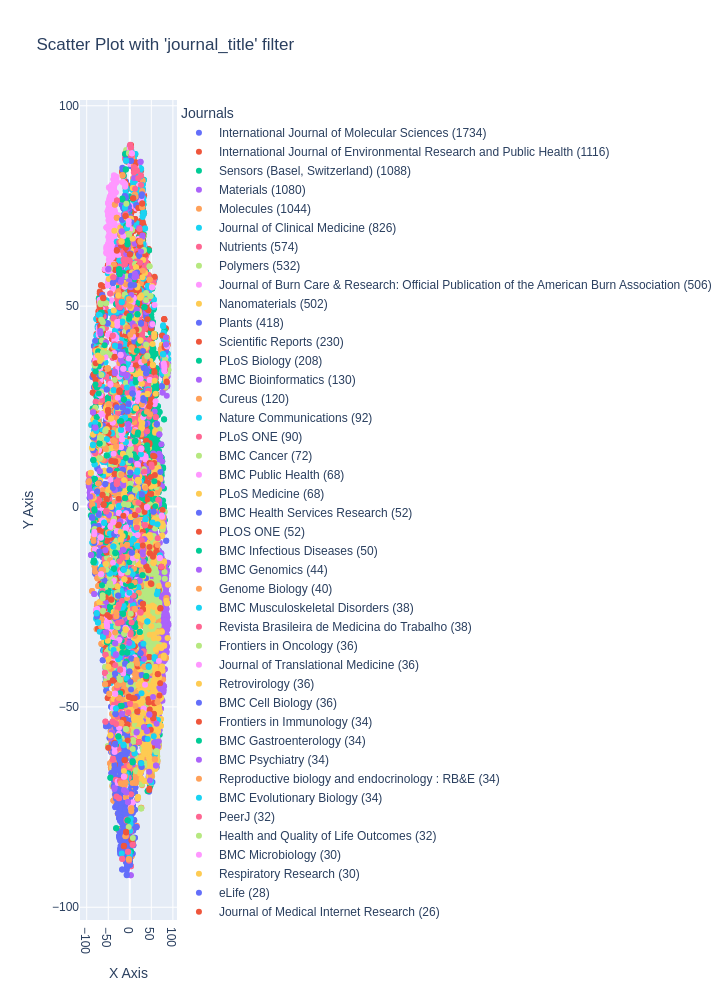

In [21]:
import plotly.graph_objects as go
from collections import Counter

# Sample data
id_list = [a.split("-")[1] for a in ref_list]
label_dict = vis_cl.label_from_metadata(list(set(id_list)), embeddingDir, "journal_title")
label_vals = [label_dict[id_val] for id_val in id_list]
data = label_vals
coordinates = redCalc[0]

# Count occurrences of each label
label_counts = Counter(label_vals)

# Create updated labels with counts
updated_labels = {label: f"{label} ({count})" for label, count in label_counts.items()}

# Create traces for each unique label
traces = []
for label in label_counts.keys():
    indices = [i for i, l in enumerate(label_vals) if l == label]
    traces.append(go.Scatter(
        x=[coordinates[i][0] for i in indices],
        y=[coordinates[i][1] for i in indices],
        mode='markers',
        name=updated_labels[label],
        text=[updated_labels[label]] * len(indices),
        hoverinfo='text'
    ))

# Sort traces by label occurrence count
traces.sort(key=lambda trace: label_counts[trace.name.rsplit(' (', maxsplit=1)[0]], reverse=True)

fig = go.Figure(data=traces, layout=go.Layout(title="Scatter Plot with Label Occurrences"))

fig.update_layout(
    title="Scatter Plot with 'journal_title' filter",
    xaxis_title="X Axis",
    yaxis_title="Y Axis",
    legend_title="Journals",
    height=1000,
    width=1500
)

# Save the plot
fig.write_image(f'Plots/JournalColouring/{method_type}_{model_name}.png')

# Display the plot
fig.show()

### Show Search Results

## Embedding Space Analysis

### Mean and Std

Furthest means (Idx, Val):  [(481, -1.0059756010542558), (393, 1.0401859169969778), (726, -1.1683139925357846), (424, -6.163930356432369), (655, -1.1856626356459268)]
Lowest Std (Idx, Val):  [(577, 0.2858624926294264), (199, 0.2877844108253095), (22, 0.2846260948908328), (229, 0.27317847797189504), (385, 0.2891531132881214)]
Highest Std (Idx, Val):  [(183, 0.573215968244202), (160, 0.5739393267022534), (334, 0.6006849545507791), (424, 0.6722184494900135), (502, 0.6742536921506611)]


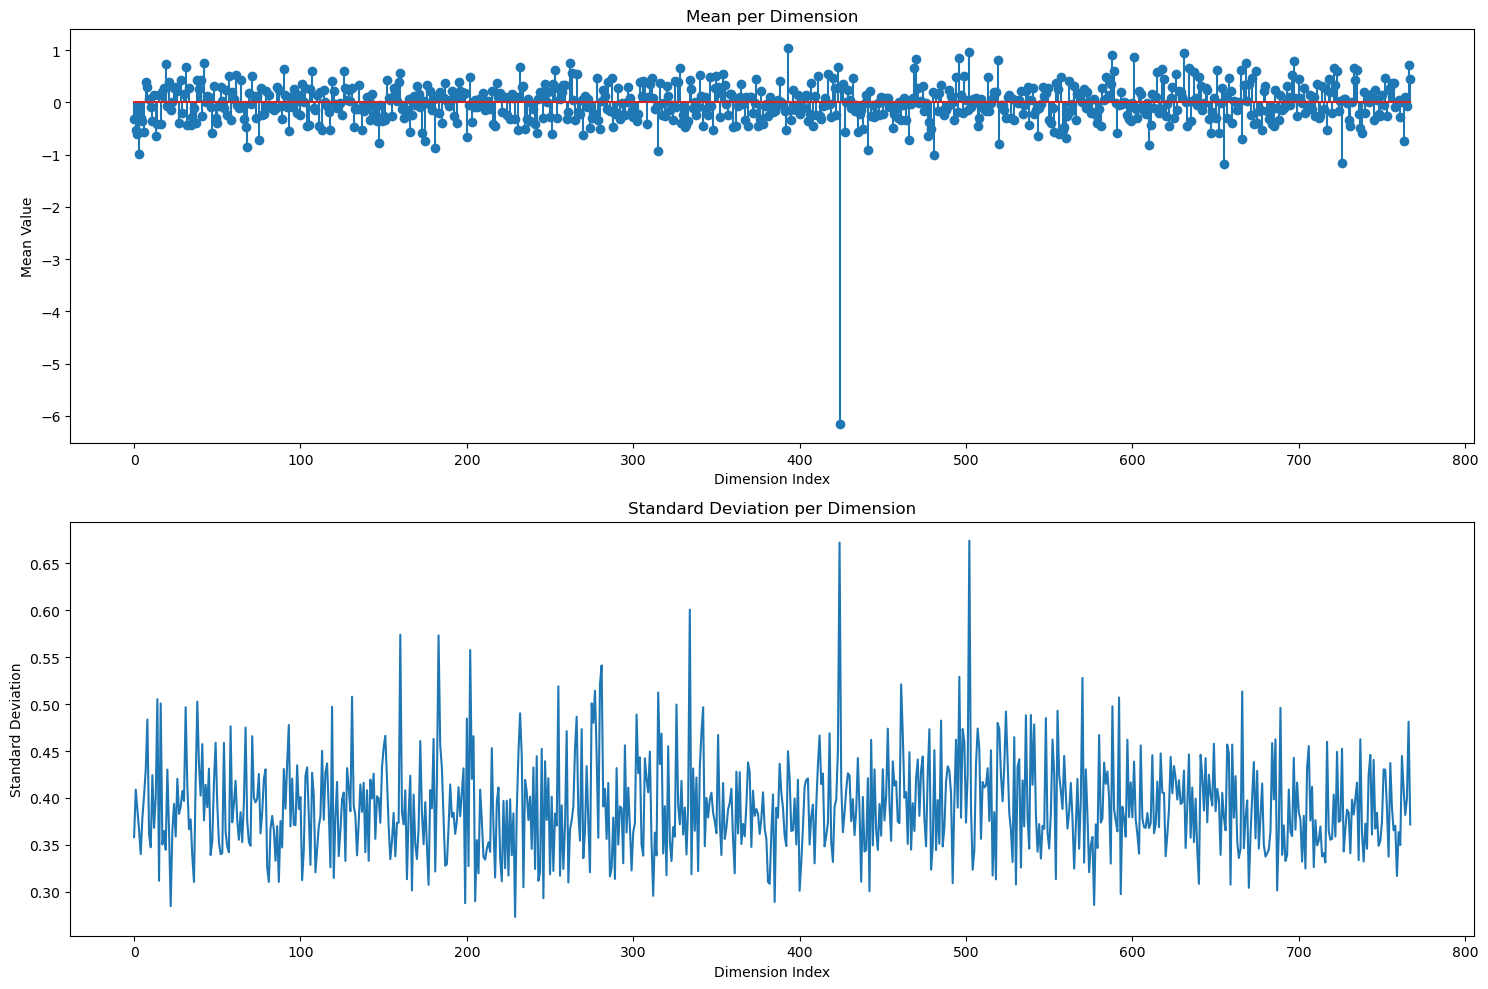

In [15]:
return_sample_size = 5
# Calculate mean and standard deviation for each dimension
mean_per_dimension = np.mean(embeddings, axis=0)
std_per_dimension = np.std(embeddings, axis=0)

# Plot the mean and std for each dimension
plt.figure(figsize=(15, 10))

# Plot mean
plt.subplot(2, 1, 1)
plt.stem(mean_per_dimension)
plt.title("Mean per Dimension")
plt.xlabel("Dimension Index")
plt.ylabel("Mean Value")

largest_mean_idx = np.argpartition(np.array(list(map(abs, mean_per_dimension))), -return_sample_size)[-return_sample_size:]
print("Furthest means (Idx, Val): ", list(zip(largest_mean_idx, mean_per_dimension[largest_mean_idx])))

# Plot standard deviation
plt.subplot(2, 1, 2)
plt.plot(std_per_dimension)
plt.title("Standard Deviation per Dimension")
plt.xlabel("Dimension Index")
plt.ylabel("Standard Deviation")

lowest_std_idx = np.argpartition(std_per_dimension, return_sample_size)[:return_sample_size]
highest_std_idx = np.argpartition(std_per_dimension, -return_sample_size)[-return_sample_size:]
print("Lowest Std (Idx, Val): ", list(zip(lowest_std_idx, std_per_dimension[lowest_std_idx])))
print("Highest Std (Idx, Val): ", list(zip(highest_std_idx, std_per_dimension[highest_std_idx])))

plt.tight_layout()

plt.savefig(f'Plots/MeanStd/{model_name}.png')
plt.show()

### Boxplots

[]

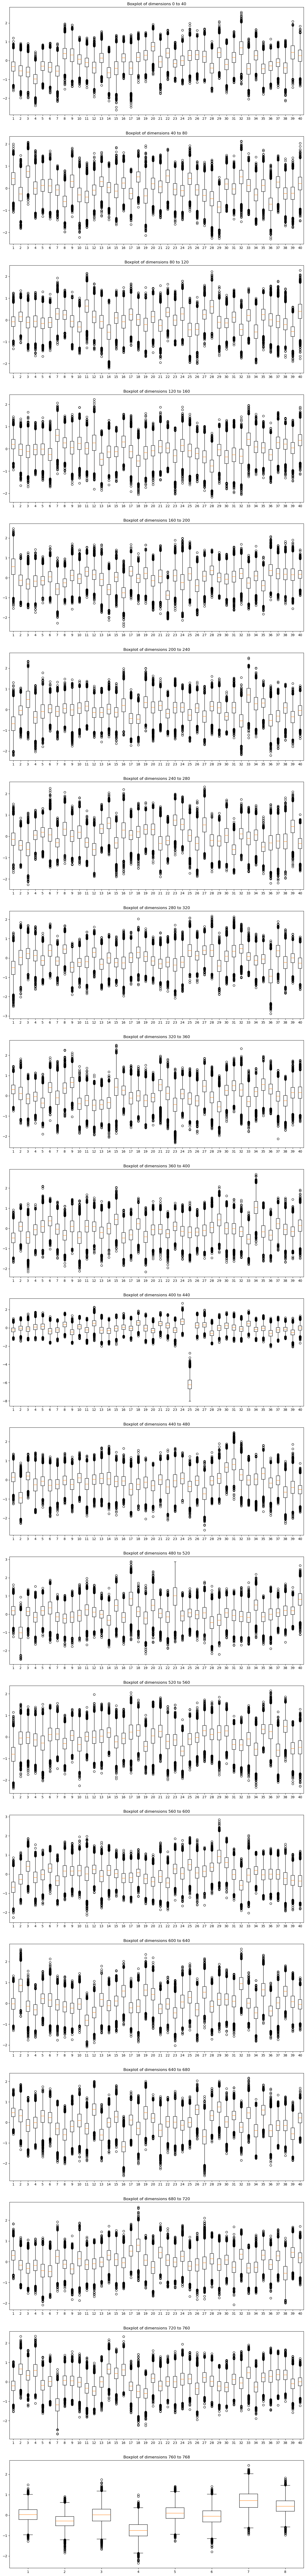

In [16]:
# Boxplot for all dimensions.
# Split into 80 dimensions each plot
dims_per_plot = 40

plot_amounts = embeddings.shape[1]//dims_per_plot + 1
plt.figure(figsize=(16, 7* plot_amounts))

for i in range(plot_amounts):
    plt.subplot(plot_amounts, 1, i+1)
    data = [e[i*dims_per_plot:min((i+1)*dims_per_plot,embeddings.shape[1])] for e in embeddings]
    bplot = plt.boxplot(np.array(data))
    plt.title(f"Boxplot of dimensions {i*dims_per_plot} to {min((i+1)*dims_per_plot,embeddings.shape[1])}")
plt.plot()

### Histogram of some dimensions

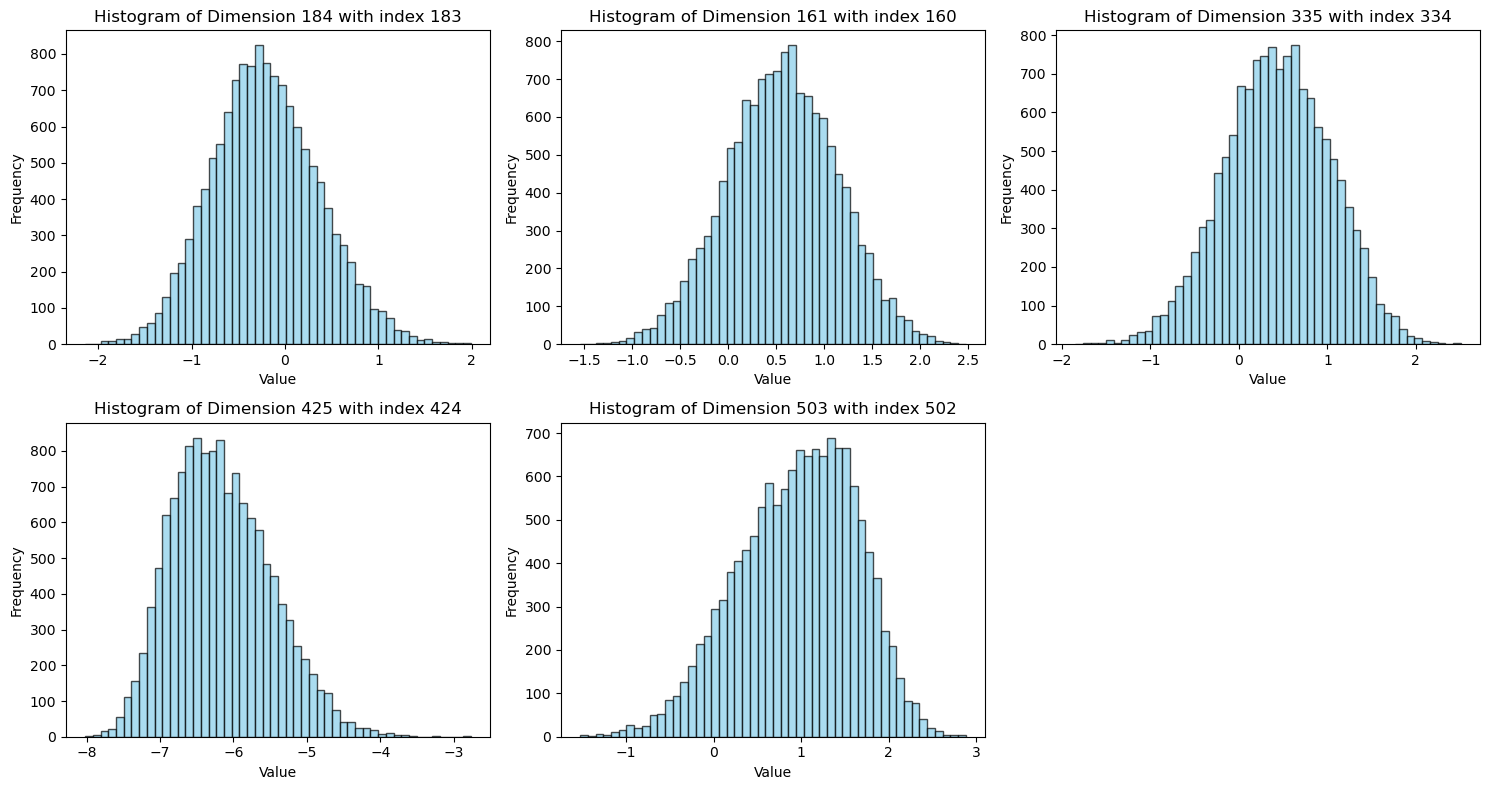

In [17]:
# highest_std_idx
# largest_mean_idx
dimensions = highest_std_idx

plt.figure(figsize=(15, 4*(len(dimensions)//3 + 1)))

for iter, idx in enumerate(dimensions):
    plt.subplot(2, 3, iter + 1)
    plt.hist(embeddings[:, idx], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Dimension {idx + 1} with index {idx}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [18]:
dim_idx = 502
print(embeddings.shape)
type_label = np.tile([0, 1], embeddings.shape[0]//2)

label = [0 if x[dim_idx] < mean_per_dimension[dim_idx] else 1 for x in embeddings]
print(label[:50])
print(f"{sum(type_label == label)/embeddings.shape[0]:.3f}%")

(13592, 768)
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
0.825%


### Correlation Matrix

Broken still

Highest correlations (Coordinates, Val):
 [((551, 705), -0.48612945543375746), ((705, 551), -0.4861294554337575), ((551, 627), 0.4870270113601209), ((767, 461), 0.4871314365810965), ((627, 551), 0.48702701136012094), ((461, 767), 0.48713143658109653), ((317, 30), -0.4988731195708239), ((281, 232), 0.4881263483420804), ((30, 317), -0.4988731195708239), ((232, 281), 0.48812634834208046), ((424, 502), -0.5983394966615919), ((502, 424), -0.5983394966615919)]
Average/Mean correlation (diagnole Zeroed):  0.0975608820123482


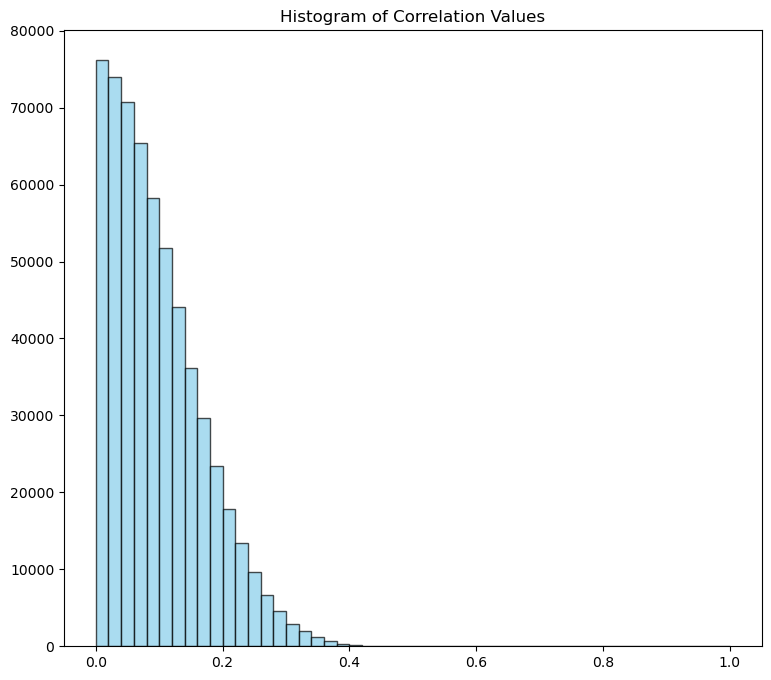

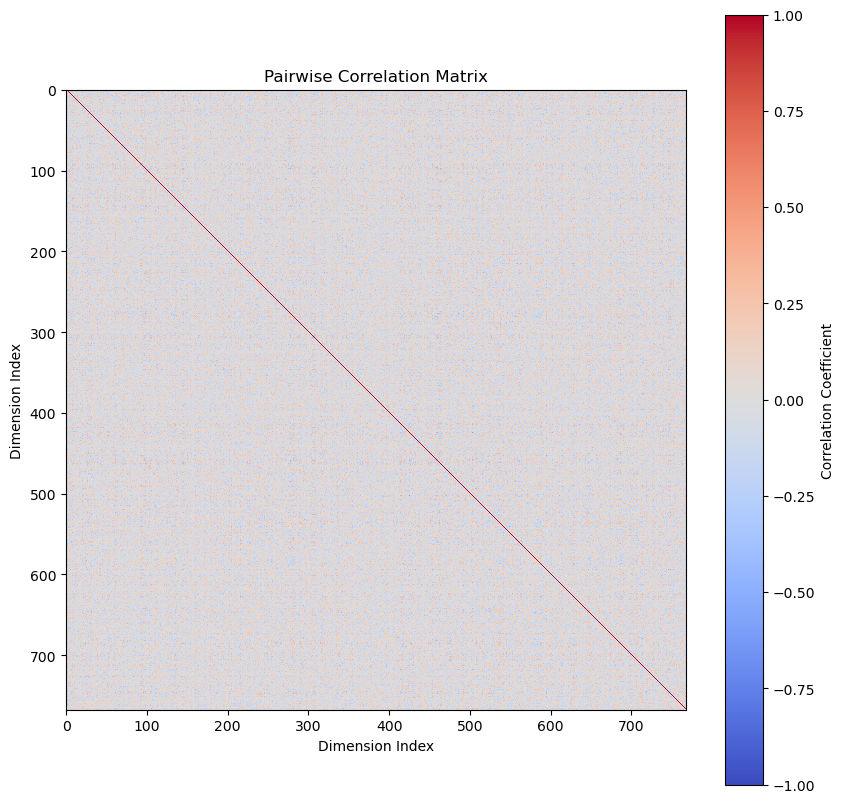

In [19]:
return_sample_size = 12
# Calculate the correlation matrix (pairwise correlation between dimensions)
correlation_matrix = np.corrcoef(embeddings.T)
corr_cp = np.copy(correlation_matrix)
np.fill_diagonal(corr_cp, 0)
highest_corr_idx = np.argpartition(np.array(list(map(abs, corr_cp.flatten()))), -(return_sample_size))
highest_corr_idx = highest_corr_idx[-(return_sample_size):]
highest_corr_coords = list(zip(highest_corr_idx//corr_cp.shape[0], highest_corr_idx%corr_cp.shape[0]))
highest_corr_val = [corr_cp[i][j] for i,j in highest_corr_coords]
print("Highest correlations (Coordinates, Val):\n", list(zip(highest_corr_coords, highest_corr_val)))

# Calculate Average Correlation absolute value (should be low)
avg_corr = np.mean(np.array(list(map(abs, corr_cp))))
print("Average/Mean correlation (diagnole Zeroed): ", avg_corr)

# Histogram of correlation values
plt.figure(figsize=(9, 8))
plt.hist(np.array(list(map(abs, corr_cp.flatten()))), range = [0,1], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Correlation Values")

plt.savefig(f'Plots/CorrelationHist/{model_name}.png')
plt.show()

# Plot the correlation matrix using heatmap
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")
plt.title("Pairwise Correlation Matrix")
plt.xlabel("Dimension Index")
plt.ylabel("Dimension Index")

plt.savefig(f'Plots/CorrelationMatrix/{model_name}.png')
plt.show()